# Visualization

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## General Analysis

In [235]:
df = pd.read_csv(
    r'Practise Set 4/economics.csv',
    index_col=0,
    parse_dates=True  # Use the exact column name here
)



In [236]:
df.head()

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945
1967-09-01,516.3,199113,11.7,4.6,2958
1967-10-01,512.9,199311,12.5,4.9,3143
1967-11-01,518.1,199498,12.5,4.7,3066


In [237]:
df.tail()

,pce,pop,psavert,uempmed,unemploy
date,,,,,
2014-12-01,12122.0,320201,5.0,12.6,8688
2015-01-01,12080.8,320367,5.5,13.4,8979
2015-02-01,12095.9,320534,5.7,13.1,8705
2015-03-01,12161.5,320707,5.2,12.2,8575
2015-04-01,12158.9,320887,5.6,11.7,8549


<Axes: xlabel='date'>

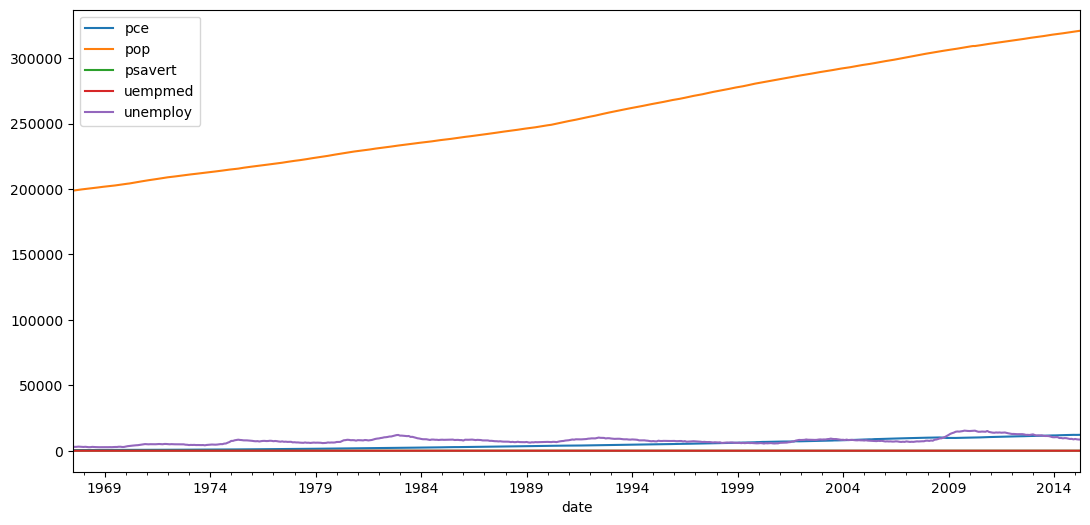

In [238]:
df.plot(figsize=(13, 6))
# Decide the horizontal and vertical size of the figure

<Axes: xlabel='date'>

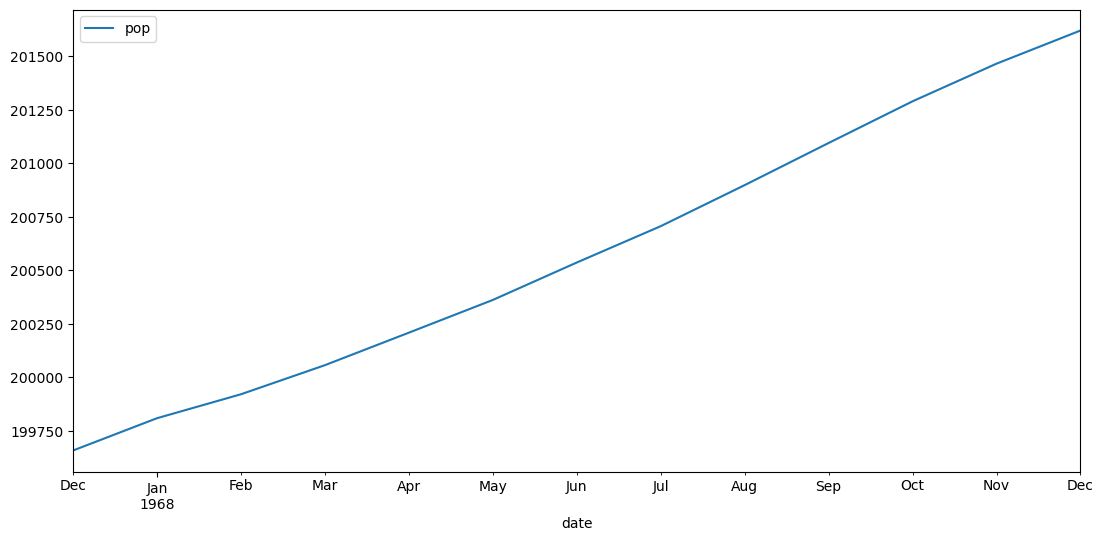

In [270]:
df.loc['1967-12': '1968-12-15'].plot(y='pop', figsize=(13, 6))
# Print the trend of 'pop' value between specified dates (indeces)

## Working on NaN (null) Values

In [272]:
df.loc['2014-01-01', 'pop'] = np.nan
# Let's set a pop value as NaN and work on it

In [273]:
df_cleaned = df.loc['2014':'2015']

<Axes: title={'center': '2014-2015 Data'}, xlabel='date'>

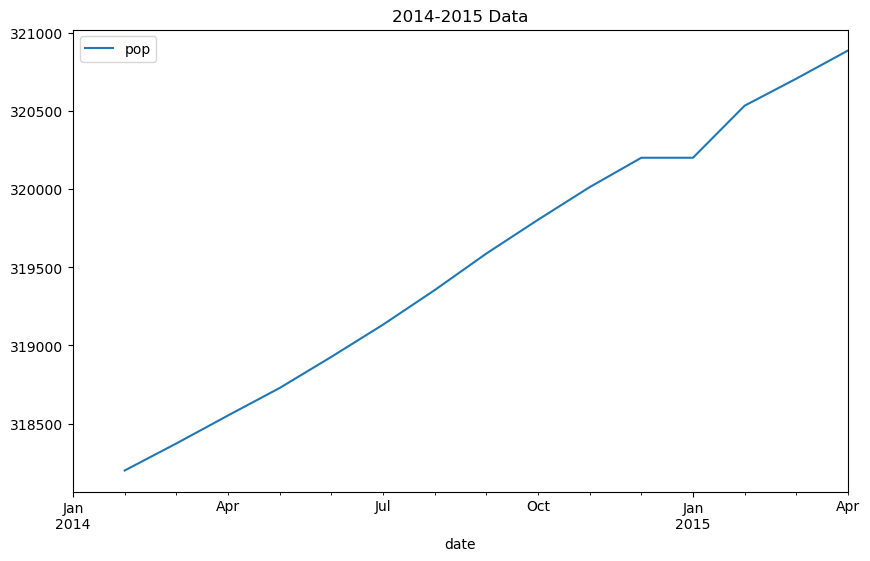

In [274]:
df_cleaned[['pop']].plot(title="2014-2015 Data", figsize=(10, 6))

In [275]:
df['pop'].isna().values.any()
# Is there any pop values set as NaN?

True

In [276]:
df.loc[df['pop'].isna()]
# Let's find where it's located

,pce,pop,psavert,uempmed,unemploy
date,,,,,
2014-01-01,11686.3,NaN,4.1,17.0,10376


In [277]:
df.loc['2014-01-01'] = df.loc['2013-12-01'].infer_objects(copy=False)
# Change the null value

In [278]:
df.loc[df['pop'].isna()]
# See if it's changed

,pce,pop,psavert,uempmed,unemploy
date,,,,,


## Cleaning Analysis

In [281]:
df.mean()
# See the general mean analysis

pce           4843.621254
pop         257188.804878
psavert          7.934321
uempmed          8.610627
unemploy      7771.217770
dtype: float64

In [282]:
df_cleaned.mean()
# Now look at the cleaned data centered in 2014-2015

pce          11982.80000
pop         319441.81250
psavert          4.94375
uempmed         13.81250
unemploy      9360.56250
dtype: float64

### Filtered Distribution

<Axes: ylabel='Frequency'>

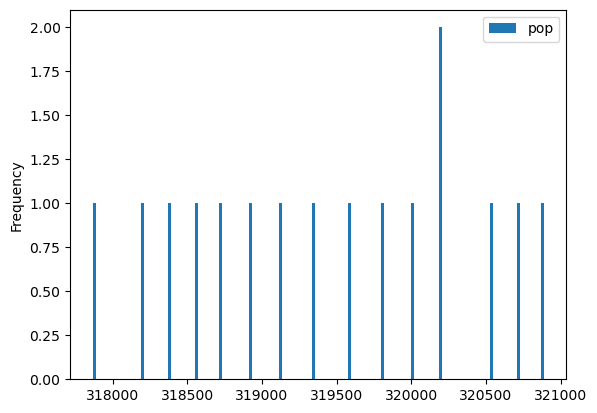

In [283]:
df_cleaned.plot(kind='hist', y='pop', bins=150)
# See the pop scheme in the cleaned form of the data

<Axes: ylabel='Frequency'>

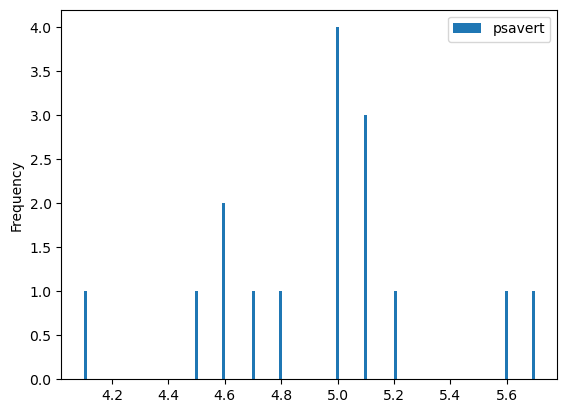

In [285]:
df_cleaned.plot(kind='hist', y='psavert', bins=150)
# See the other values, for example 'psavert'

### Histplot

<Axes: xlabel='pop', ylabel='Count'>

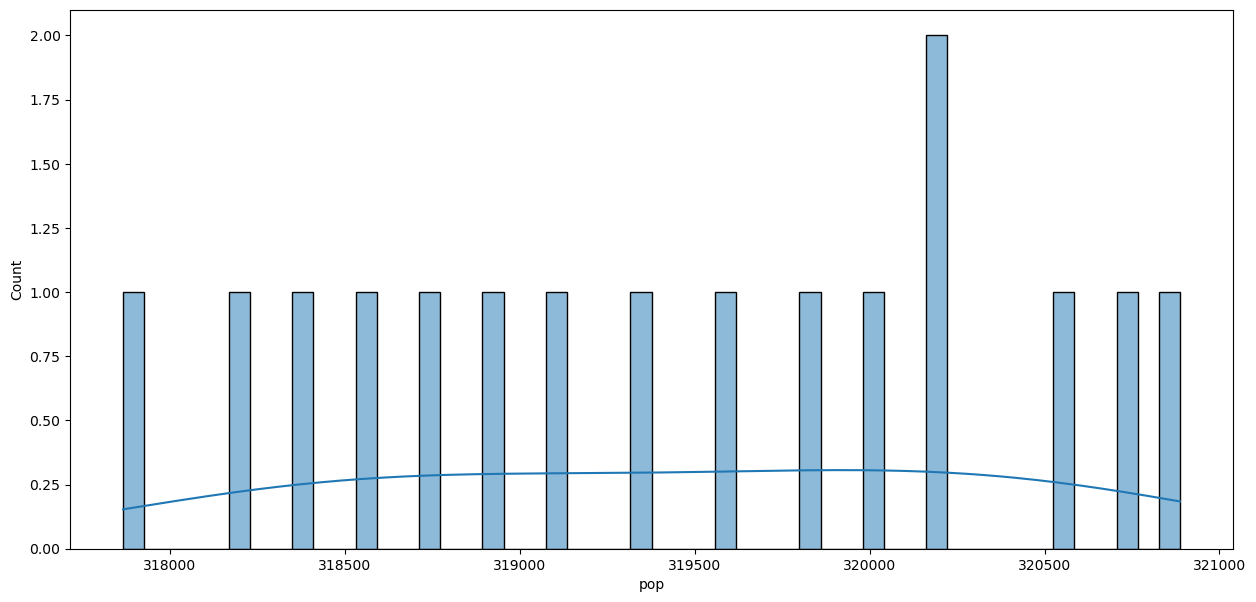

In [292]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df_cleaned['pop'], ax=ax, kde=True, bins = 50)
# See how 'pop' is distributed in cleaned form with histplot

### Jointplot

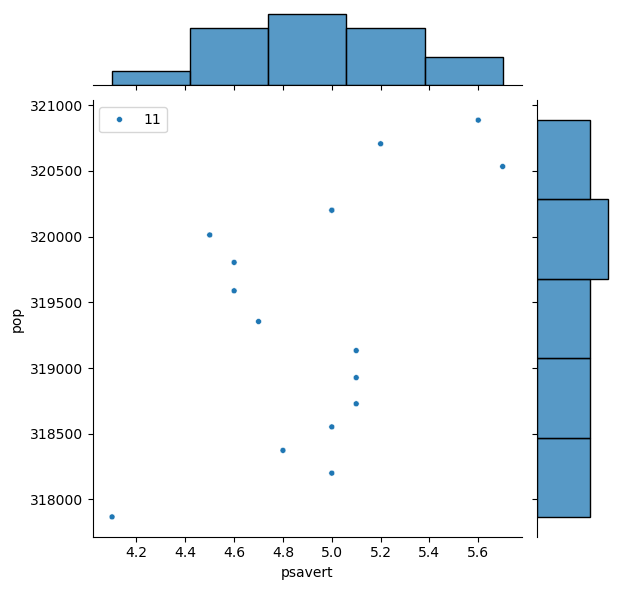

In [297]:
sns.jointplot(x="psavert", y="pop", data=df_cleaned, size=11)
# Analyze the bivariate distribution of 'psavert' and 'pop' with jointplot

### Regplot

<Axes: xlabel='psavert', ylabel='pop'>

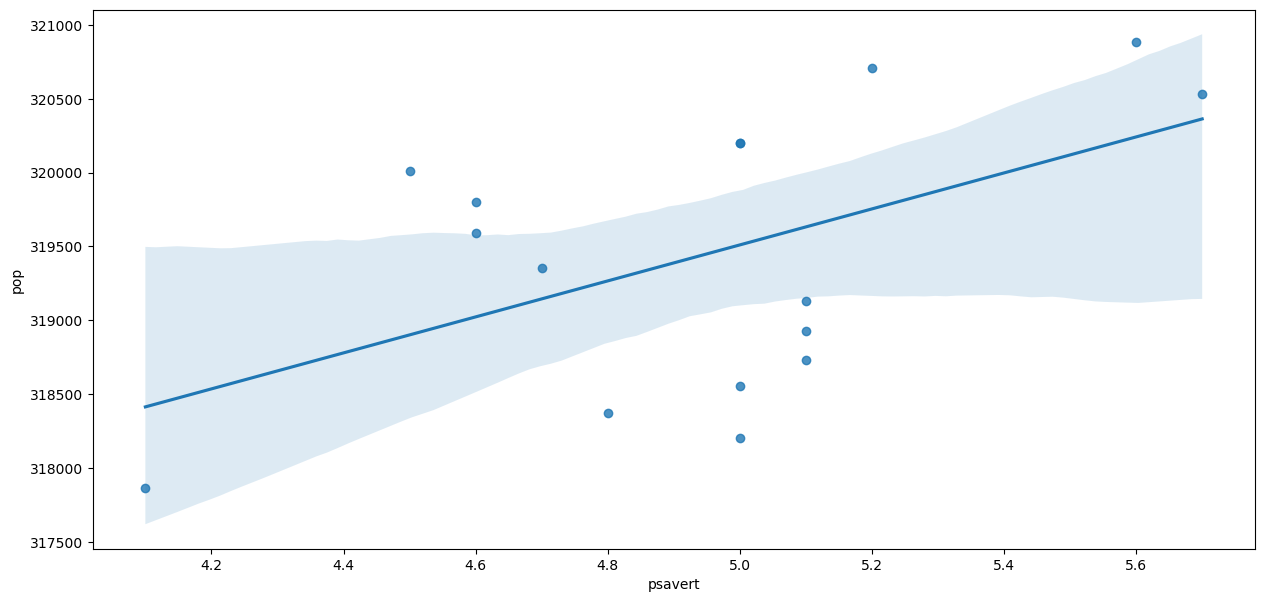

In [298]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="psavert", y="pop", data=df_cleaned, ax=ax)
# We can only see the scatterplot of this distribution with regplot